# Notebook

# Librairies

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

RANDOM_STATE = 42


In [99]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Configuration graphique

In [100]:
# Thème global
sns.set_theme(
    style="whitegrid",
    context="notebook",
    palette="deep"
)
COLOR_NO_DEFAULT = "#4C72B0"   # bleu seaborn
COLOR_DEFAULT = "#DD8452"      # orange doux

# Les données

In [101]:
DATA_DIR = Path("./data/raw")

## Application_train.csv

In [102]:
df = pd.read_csv(DATA_DIR / "application_train.csv")
df.shape

(307511, 122)

In [103]:
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [105]:
df["TARGET"].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

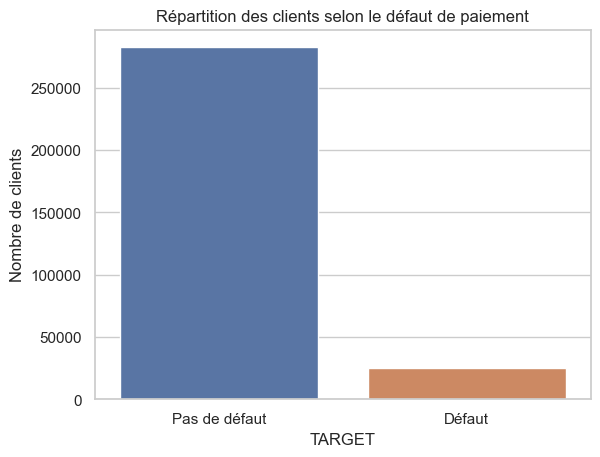

In [106]:
# graphique target
sns.barplot(
    x=df["TARGET"].value_counts().index,
    y=df["TARGET"].value_counts().values,
    palette=[COLOR_NO_DEFAULT, COLOR_DEFAULT]
)
plt.xticks([0, 1], ["Pas de défaut", "Défaut"])
plt.title("Répartition des clients selon le défaut de paiement")
plt.ylabel("Nombre de clients")
plt.show()

In [107]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

### Valeurs manquantes

In [108]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [109]:
missing_rate = df.isna().mean().sort_values(ascending=False)
print(missing_rate.shape)
missing_rate.head(15)

(122,)


COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
FLOORSMIN_AVG               0.678486
FLOORSMIN_MODE              0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_MEDI            0.664978
YEARS_BUILD_MODE            0.664978
dtype: float64

In [110]:
missing_rate[missing_rate > 0].shape

(67,)

Un grand nombre de variables présente des valeurs manquantes importantes.
Certaines variables sont très incomplètes et devront être exclues ou traitées
spécifiquement lors de la phase de préparation des données.


Le jeu de données contient un mélange de variables numériques et catégorielles.
Cette hétérogénéité nécessitera un prétraitement spécifique
(imputation, encodage) avant la modélisation.

### AGE

In [111]:
# Âge en années (plus lisible que DAYS_BIRTH)
df["AGE_YEARS"] = -df["DAYS_BIRTH"] / 365

df["AGE_YEARS"].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE_YEARS, dtype: float64

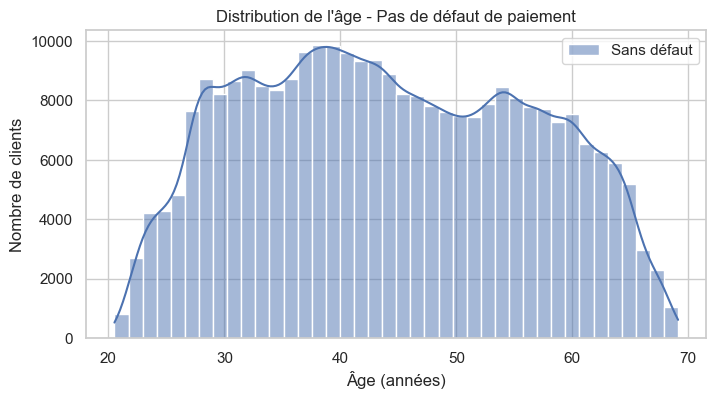

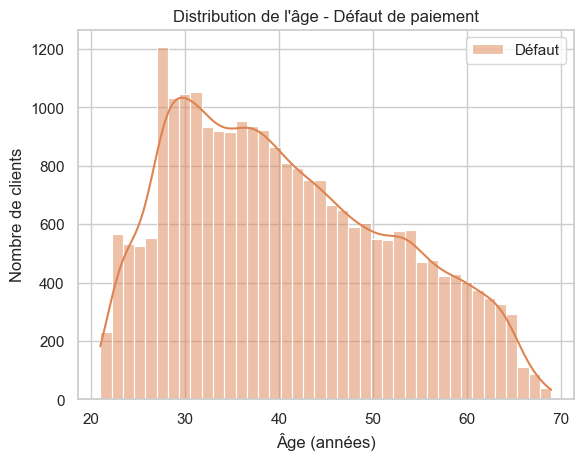

In [112]:
plt.figure(figsize=(8, 4))

sns.histplot(
    df[df["TARGET"] == 0]["AGE_YEARS"],
    bins=40,
    color=COLOR_NO_DEFAULT,
    label="Sans défaut",
    kde=True,
    # alpha=0.6
)
plt.xlabel("Âge (années)")
plt.ylabel("Nombre de clients")
plt.title("Distribution de l'âge - Pas de défaut de paiement")
plt.legend()
plt.show()

sns.histplot(
    df[df["TARGET"] == 1]["AGE_YEARS"],
    bins=40,
    color=COLOR_DEFAULT,
    label="Défaut",
    kde=True,
    # alpha=0.6
)
plt.xlabel("Âge (années)")
plt.ylabel("Nombre de clients")
plt.title("Distribution de l'âge - Défaut de paiement")
plt.legend()

plt.show()


Les clients les plus jeunes présentent une probabilité plus élevée de défaut de paiement.
Cette observation est cohérente avec l’intuition métier :
les profils plus jeunes ont souvent une situation financière moins stable.

In [113]:
age_data = df[['TARGET', 'AGE_YEARS']]
age_data['YEAR_BIN'] = pd.cut(age_data['AGE_YEARS'], bins=np.linspace(20, 70, 11))
age_groups  = age_data.groupby('YEAR_BIN').mean()
age_groups

,TARGET,AGE_YEARS
YEAR_BIN,,
"(20.0, 25.0]",0.123036,23.377522
"(25.0, 30.0]",0.111436,27.822518
"(30.0, 35.0]",0.102814,32.479037
"(35.0, 40.0]",0.089414,37.555913
"(40.0, 45.0]",0.078491,42.459346
"(45.0, 50.0]",0.074171,47.462741
"(50.0, 55.0]",0.066968,52.593136
"(55.0, 60.0]",0.055314,57.491131
"(60.0, 65.0]",0.052737,62.412459


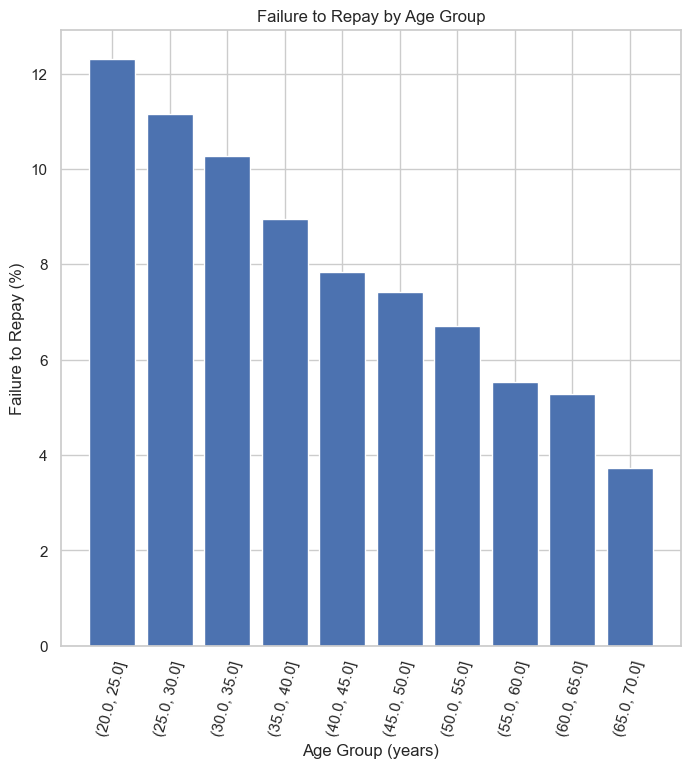

In [114]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

### Revenu annuel

In [115]:
df["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

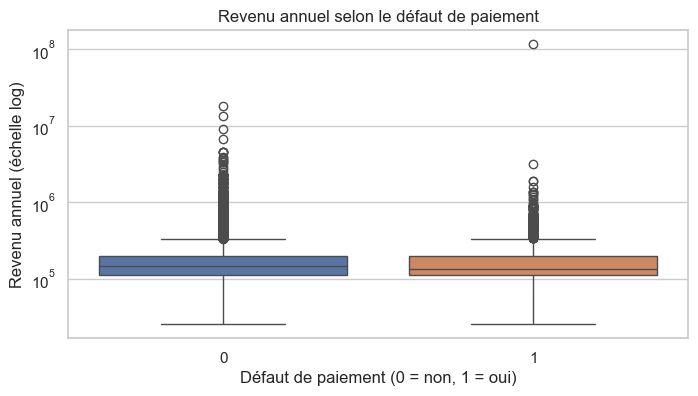

In [116]:
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df,
    x="TARGET",
    y="AMT_INCOME_TOTAL",
    palette=[COLOR_NO_DEFAULT, COLOR_DEFAULT]
)
plt.yscale("log")
plt.title("Revenu annuel selon le défaut de paiement")
plt.xlabel("Défaut de paiement (0 = non, 1 = oui)")
plt.ylabel("Revenu annuel (échelle log)")
plt.show()


### Charge de crédit

In [117]:
# Ratio simple : annuité / crédit
df["PAYMENT_RATE"] = df["AMT_ANNUITY"] / df["AMT_CREDIT"]

df["PAYMENT_RATE"].describe()

count    307499.000000
mean          0.053695
std           0.022481
min           0.022073
25%           0.036900
50%           0.050000
75%           0.064043
max           0.124430
Name: PAYMENT_RATE, dtype: float64

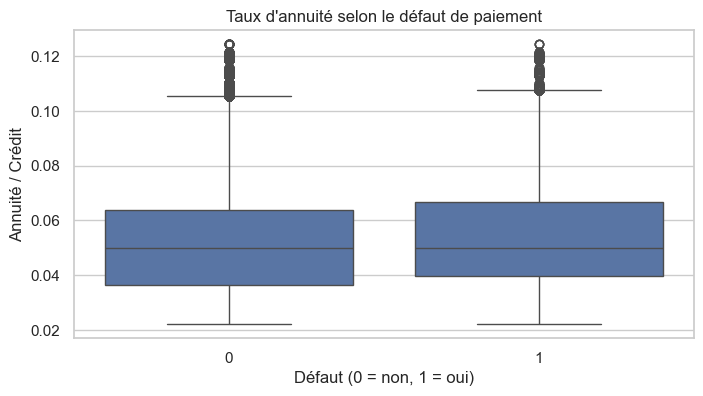

In [118]:
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df,
    x="TARGET",
    y="PAYMENT_RATE"
)
plt.title("Taux d'annuité selon le défaut de paiement")
plt.xlabel("Défaut (0 = non, 1 = oui)")
plt.ylabel("Annuité / Crédit")
plt.show()

Les clients en défaut présentent généralement un taux d’annuité plus élevé,
ce qui traduit une charge de remboursement plus importante par rapport
au montant du crédit.

### Corrélations

In [119]:
# Find correlations with the target and sort
correlations = df.corr(numeric_only=True)['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
AGE_YEARS                    -0.078239
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226


In [120]:
ext_data = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


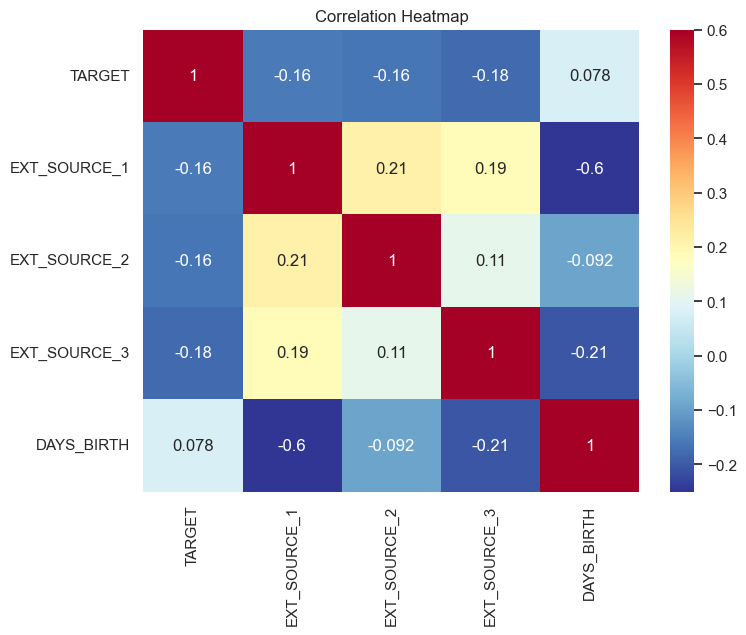

In [121]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

## bureau.csv

#### Chargement et Statistiques

In [122]:
df_bureau = pd.read_csv(DATA_DIR / "bureau.csv")
print(df_bureau.shape)
display(df_bureau.head())
print(df_bureau.info(verbose=True))
display(df_bureau.isna().sum() / df_bureau.shape[0])

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.061496
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_MAX_OVERDUE    0.655133
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            0.000008
AMT_CREDIT_SUM_DEBT       0.150119
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
AMT_ANNUITY               0.714735
dtype: float64

## bureau_balance.csv

#### Chargement et Statistiques

In [123]:
df_bureau_balance = pd.read_csv(DATA_DIR / "bureau_balance.csv")
print(df_bureau_balance.shape)
display(df_bureau_balance.head())
print(df_bureau_balance.info(verbose=True))
display(df_bureau_balance.isna().sum() / df_bureau_balance.shape[0])

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

## credit_card_balance.csv

#### Chargement et Statistiques

In [124]:
df_credit_card_balance = pd.read_csv(DATA_DIR / "credit_card_balance.csv")
print(df_credit_card_balance.shape)
display(df_credit_card_balance.head())
print(df_credit_card_balance.info(verbose=True))
display(df_credit_card_balance.isna().sum() / df_credit_card_balance.shape[0])

(3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

SK_ID_PREV                    0.000000
SK_ID_CURR                    0.000000
MONTHS_BALANCE                0.000000
AMT_BALANCE                   0.000000
AMT_CREDIT_LIMIT_ACTUAL       0.000000
AMT_DRAWINGS_ATM_CURRENT      0.195249
AMT_DRAWINGS_CURRENT          0.000000
AMT_DRAWINGS_OTHER_CURRENT    0.195249
AMT_DRAWINGS_POS_CURRENT      0.195249
AMT_INST_MIN_REGULARITY       0.079482
AMT_PAYMENT_CURRENT           0.199981
AMT_PAYMENT_TOTAL_CURRENT     0.000000
AMT_RECEIVABLE_PRINCIPAL      0.000000
AMT_RECIVABLE                 0.000000
AMT_TOTAL_RECEIVABLE          0.000000
CNT_DRAWINGS_ATM_CURRENT      0.195249
CNT_DRAWINGS_CURRENT          0.000000
CNT_DRAWINGS_OTHER_CURRENT    0.195249
CNT_DRAWINGS_POS_CURRENT      0.195249
CNT_INSTALMENT_MATURE_CUM     0.079482
NAME_CONTRACT_STATUS          0.000000
SK_DPD                        0.000000
SK_DPD_DEF                    0.000000
dtype: float64

## installments_payments.csv

#### Chargement et Statistiques

In [125]:
df_installments_payments = pd.read_csv(DATA_DIR / "installments_payments.csv")
print(df_installments_payments.shape)
display(df_installments_payments.head())
print(df_installments_payments.info(verbose=True))
display(df_installments_payments.isna().sum() / df_installments_payments.shape[0])

(13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
DAYS_ENTRY_PAYMENT        0.000214
AMT_INSTALMENT            0.000000
AMT_PAYMENT               0.000214
dtype: float64

## POS_CASH_balance.csv

#### Chargement et Statistiques

In [126]:
df_POS_CASH_balance = pd.read_csv(DATA_DIR / "POS_CASH_balance.csv")
print(df_POS_CASH_balance.shape)
display(df_POS_CASH_balance.head())
print(df_POS_CASH_balance.info(verbose=True))
display(df_POS_CASH_balance.isna().sum() / df_POS_CASH_balance.shape[0])

(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
CNT_INSTALMENT           0.002607
CNT_INSTALMENT_FUTURE    0.002608
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

## previous_application.csv

#### Chargement et Statistiques

In [127]:
df_previous_application = pd.read_csv(DATA_DIR / "previous_application.csv")
print(df_previous_application.shape)
display(df_previous_application.head())
print(df_previous_application.info(verbose=True))
display(df_previous_application.isna().sum() / df_previous_application.shape[0])

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

SK_ID_PREV                     0.000000e+00
SK_ID_CURR                     0.000000e+00
NAME_CONTRACT_TYPE             0.000000e+00
AMT_ANNUITY                    2.228667e-01
AMT_APPLICATION                0.000000e+00
AMT_CREDIT                     5.987257e-07
AMT_DOWN_PAYMENT               5.363648e-01
AMT_GOODS_PRICE                2.308177e-01
WEEKDAY_APPR_PROCESS_START     0.000000e+00
HOUR_APPR_PROCESS_START        0.000000e+00
FLAG_LAST_APPL_PER_CONTRACT    0.000000e+00
NFLAG_LAST_APPL_IN_DAY         0.000000e+00
RATE_DOWN_PAYMENT              5.363648e-01
RATE_INTEREST_PRIMARY          9.964370e-01
RATE_INTEREST_PRIVILEGED       9.964370e-01
NAME_CASH_LOAN_PURPOSE         0.000000e+00
NAME_CONTRACT_STATUS           0.000000e+00
DAYS_DECISION                  0.000000e+00
NAME_PAYMENT_TYPE              0.000000e+00
CODE_REJECT_REASON             0.000000e+00
NAME_TYPE_SUITE                4.911975e-01
NAME_CLIENT_TYPE               0.000000e+00
NAME_GOODS_CATEGORY            0

## Application_test.csv

In [128]:
df_test = pd.read_csv(DATA_DIR / "application_test.csv")
print(df_test.shape)
df_test.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Synthèse EDA

Cette analyse exploratoire ciblée met en évidence plusieurs signaux cohérents
avec les enjeux du scoring crédit :
- l’âge,
- le niveau de revenu,
- la charge de remboursement.

Ces variables constituent des candidates naturelles pour la phase
de préparation des données et de feature engineering.

Corrélations :
Les features sont en général peu corrélées avec la cible.
Le features engineering permettra d'améliorer les performances.

# Feature engineering

## bureau / bureau_balance

### Fonction bureau_and_balance

In [129]:
import numpy as np
import pandas as pd
import gc

def one_hot_encoder_return_newcols(df, nan_as_category=True):
    original_cols = df.columns.tolist()
    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
    df = pd.get_dummies(df, columns=cat_cols, dummy_na=nan_as_category)
    new_cols = [c for c in df.columns if c not in original_cols]
    return df, new_cols

def bureau_and_balance_reduced(data_dir=DATA_DIR, num_rows=None, nan_as_category=True):
    """
    Version réduite, orientée compréhension.
    Sortie : 1 ligne par SK_ID_CURR, features numériques uniquement.
    """

    # -------------------------
    # 1) Load
    # -------------------------
    bureau = pd.read_csv(f"{data_dir}/bureau.csv", nrows=num_rows)
    bb = pd.read_csv(f"{data_dir}/bureau_balance.csv", nrows=num_rows)

    # -------------------------
    # 2) bureau_balance -> SK_ID_BUREAU
    # -------------------------
    bb, bb_cat = one_hot_encoder_return_newcols(bb, nan_as_category=nan_as_category)

    # On garde seulement quelques statuts "clés" si présents
    keep_status = [
        "STATUS_0", "STATUS_1", "STATUS_2", "STATUS_3", "STATUS_4", "STATUS_5", "STATUS_C", "STATUS_X"
    ]
    keep_bb_cols = [c for c in bb_cat if any(c.endswith(s) or c == s for s in keep_status)]
    # Remarque: selon Kaggle, les colonnes peuvent s'appeler STATUS_0 ou STATUS_0. Ici on couvre large.
    # Si ta one-hot produit exactement STATUS_0, STATUS_1... alors keep_bb_cols marche.

    bb_aggs = {
        "MONTHS_BALANCE": ["min", "count"],  # ancienneté + longueur d'historique
    }
    for c in keep_bb_cols:
        bb_aggs[c] = ["mean"]  # fréquence du statut sur l'historique

    bb_agg = bb.groupby("SK_ID_BUREAU").agg(bb_aggs)
    bb_agg.columns = [f"BB_{col}_{stat.upper()}" for col, stat in bb_agg.columns]

    del bb
    gc.collect()

    # -------------------------
    # 3) Merge into bureau (crédit enrichi avec historique résumé)
    # -------------------------
    bureau = bureau.merge(bb_agg, how="left", on="SK_ID_BUREAU")

    # -------------------------
    # 4) bureau -> SK_ID_CURR (features réduites)
    # -------------------------
    # OHE seulement pour avoir CREDIT_ACTIVE_Active en proportion
    bureau_ohe, bureau_cat = one_hot_encoder_return_newcols(bureau, nan_as_category=nan_as_category)

    # Quelques colonnes numériques clés (si présentes)
    key_num_cols = [
        "DAYS_CREDIT",
        "CREDIT_DAY_OVERDUE",
        "AMT_CREDIT_SUM",
        "AMT_CREDIT_SUM_DEBT",
        "CNT_CREDIT_PROLONG",
    ]
    # On ajoute les colonnes BB_* créées
    bb_num_cols = [c for c in bureau_ohe.columns if c.startswith("BB_")]

    # On garde uniquement celles qui existent
    key_num_cols = [c for c in key_num_cols if c in bureau_ohe.columns]

    # Features globales au niveau client
    aggs = {}

    # nombre de crédits bureau
    aggs["DAYS_CREDIT"] = ["count", "min", "max"] if "DAYS_CREDIT" in bureau_ohe.columns else ["count"]

    # Endettement / exposition
    if "AMT_CREDIT_SUM" in bureau_ohe.columns:
        aggs["AMT_CREDIT_SUM"] = ["sum", "max"]
    if "AMT_CREDIT_SUM_DEBT" in bureau_ohe.columns:
        aggs["AMT_CREDIT_SUM_DEBT"] = ["sum"]

    # Retards / prolongations
    if "CREDIT_DAY_OVERDUE" in bureau_ohe.columns:
        aggs["CREDIT_DAY_OVERDUE"] = ["max"]
    if "CNT_CREDIT_PROLONG" in bureau_ohe.columns:
        aggs["CNT_CREDIT_PROLONG"] = ["sum"]

    # Infos d'historique bureau_balance résumées (au niveau crédit)
    # au niveau client, on prend:
    # - MIN de BB_MONTHS_BALANCE_MIN : crédit le plus ancien
    # - MEAN de BB_MONTHS_BALANCE_COUNT : longueur moyenne d'historique
    # - MEAN des fréquences de statuts (moyenne des fréquences par crédit)
    bb_cols_min = [c for c in bb_num_cols if c.endswith("_MIN")]
    bb_cols_count = [c for c in bb_num_cols if c.endswith("_COUNT")]
    bb_cols_mean = [c for c in bb_num_cols if c.endswith("_MEAN")]

    for c in bb_cols_min:
        aggs[c] = ["min"]
    for c in bb_cols_count:
        aggs[c] = ["mean"]
    for c in bb_cols_mean:
        aggs[c] = ["mean"]

    # Proportion de crédits actifs (si existe)
    if "CREDIT_ACTIVE_Active" in bureau_ohe.columns:
        aggs["CREDIT_ACTIVE_Active"] = ["mean"]

    buro_agg = bureau_ohe.groupby("SK_ID_CURR").agg(aggs)
    buro_agg.columns = [f"BURO_{col}_{stat.upper()}" for col, stat in buro_agg.columns]

    # -------------------------
    # 5) Active / Closed (réduit)
    # -------------------------
    def agg_subset(df, prefix):
        sub_aggs = {}
        if "AMT_CREDIT_SUM" in df.columns:
            sub_aggs["AMT_CREDIT_SUM"] = ["sum"]
        if "AMT_CREDIT_SUM_DEBT" in df.columns:
            sub_aggs["AMT_CREDIT_SUM_DEBT"] = ["sum"]
        if "CREDIT_DAY_OVERDUE" in df.columns:
            sub_aggs["CREDIT_DAY_OVERDUE"] = ["max"]
        if not sub_aggs:
            return None
        out = df.groupby("SK_ID_CURR").agg(sub_aggs)
        out.columns = [f"{prefix}_{col}_{stat.upper()}" for col, stat in out.columns]
        return out

    if "CREDIT_ACTIVE_Active" in bureau_ohe.columns:
        active_df = bureau_ohe[bureau_ohe["CREDIT_ACTIVE_Active"] == 1]
        active_agg = agg_subset(active_df, "BURO_ACTIVE")
        if active_agg is not None:
            buro_agg = buro_agg.join(active_agg, how="left")

    if "CREDIT_ACTIVE_Closed" in bureau_ohe.columns:
        closed_df = bureau_ohe[bureau_ohe["CREDIT_ACTIVE_Closed"] == 1]
        closed_agg = agg_subset(closed_df, "BURO_CLOSED")
        if closed_agg is not None:
            buro_agg = buro_agg.join(closed_agg, how="left")

    # Nettoyage
    del bureau, bureau_ohe
    gc.collect()

    # sécurité : uniquement numérique
    non_num = buro_agg.select_dtypes(exclude=[np.number]).columns.tolist()
    if non_num:
        raise ValueError(f"Non-numeric columns in output: {non_num[:10]}")

    return buro_agg


### Test fonction

In [130]:
buro = bureau_and_balance_reduced(data_dir=DATA_DIR, num_rows=50000)
print(buro.shape)
print(buro.isna().mean().sort_values(ascending=False).head(10))


(10171, 25)
BURO_BB_STATUS_2_MEAN_MEAN           0.988202
BURO_BB_STATUS_5_MEAN_MEAN           0.988202
BURO_BB_STATUS_X_MEAN_MEAN           0.988202
BURO_BB_MONTHS_BALANCE_MIN_MIN       0.988202
BURO_BB_MONTHS_BALANCE_COUNT_MEAN    0.988202
BURO_BB_STATUS_0_MEAN_MEAN           0.988202
BURO_BB_STATUS_1_MEAN_MEAN           0.988202
BURO_BB_STATUS_C_MEAN_MEAN           0.988202
BURO_BB_STATUS_3_MEAN_MEAN           0.988202
BURO_BB_STATUS_4_MEAN_MEAN           0.988202
dtype: float64


In [131]:
# seuil clair et justifiable
na_threshold = 0.95

cols_to_drop = buro.columns[buro.isna().mean() > na_threshold]
print(f"Colonnes supprimées (> {na_threshold*100:.0f}% NaN):", cols_to_drop.tolist())

buro_clean = buro.drop(columns=cols_to_drop)
print("Nouvelle shape:", buro_clean.shape)
buro_clean.head()

Colonnes supprimées (> 95% NaN): ['BURO_BB_MONTHS_BALANCE_MIN_MIN', 'BURO_BB_MONTHS_BALANCE_COUNT_MEAN', 'BURO_BB_STATUS_0_MEAN_MEAN', 'BURO_BB_STATUS_1_MEAN_MEAN', 'BURO_BB_STATUS_2_MEAN_MEAN', 'BURO_BB_STATUS_3_MEAN_MEAN', 'BURO_BB_STATUS_4_MEAN_MEAN', 'BURO_BB_STATUS_5_MEAN_MEAN', 'BURO_BB_STATUS_C_MEAN_MEAN', 'BURO_BB_STATUS_X_MEAN_MEAN']
Nouvelle shape: (10171, 15)


,BURO_DAYS_CREDIT_COUNT,BURO_DAYS_CREDIT_MIN,BURO_DAYS_CREDIT_MAX,BURO_AMT_CREDIT_SUM_SUM,BURO_AMT_CREDIT_SUM_MAX,BURO_AMT_CREDIT_SUM_DEBT_SUM,BURO_CREDIT_DAY_OVERDUE_MAX,BURO_CNT_CREDIT_PROLONG_SUM,BURO_CREDIT_ACTIVE_Active_MEAN,BURO_ACTIVE_AMT_CREDIT_SUM_SUM,BURO_ACTIVE_AMT_CREDIT_SUM_DEBT_SUM,BURO_ACTIVE_CREDIT_DAY_OVERDUE_MAX,BURO_CLOSED_AMT_CREDIT_SUM_SUM,BURO_CLOSED_AMT_CREDIT_SUM_DEBT_SUM,BURO_CLOSED_CREDIT_DAY_OVERDUE_MAX
SK_ID_CURR,,,,,,,,,,,,,,,
100016,6,-1634,-128,407484.000,91264.500,63724.500,0,0,0.500000,269257.5,63724.500,0.0,138226.500,0.0,0.0
100053,7,-2893,-1764,648589.500,225000.000,0.000,0,0,0.142857,48820.5,0.000,0.0,599769.000,0.0,0.0
100165,2,-2325,-1225,118068.480,64104.480,0.000,0,0,0.000000,NaN,NaN,NaN,118068.480,0.0,0.0
100166,13,-2058,-106,582614.595,126121.095,106414.425,0,0,0.153846,172539.0,106414.425,0.0,410075.595,0.0,0.0
100294,5,-1137,-217,900955.170,360000.000,90522.180,0,0,0.200000,112500.0,90522.180,0.0,788455.170,0.0,0.0


### Valeurs manquantes

In [132]:
na_rate = buro.isna().mean().sort_values(ascending=False)

print("\nTop 20 colonnes les plus manquantes (taux NaN):")
print(na_rate.head(20))

print("\nRésumé NaN (%):")
print(na_rate.describe(percentiles=[.5, .75, .9, .95, .99]))



Top 20 colonnes les plus manquantes (taux NaN):
BURO_BB_STATUS_2_MEAN_MEAN             0.988202
BURO_BB_STATUS_5_MEAN_MEAN             0.988202
BURO_BB_STATUS_X_MEAN_MEAN             0.988202
BURO_BB_MONTHS_BALANCE_MIN_MIN         0.988202
BURO_BB_MONTHS_BALANCE_COUNT_MEAN      0.988202
BURO_BB_STATUS_0_MEAN_MEAN             0.988202
BURO_BB_STATUS_1_MEAN_MEAN             0.988202
BURO_BB_STATUS_C_MEAN_MEAN             0.988202
BURO_BB_STATUS_3_MEAN_MEAN             0.988202
BURO_BB_STATUS_4_MEAN_MEAN             0.988202
BURO_ACTIVE_CREDIT_DAY_OVERDUE_MAX     0.189067
BURO_ACTIVE_AMT_CREDIT_SUM_DEBT_SUM    0.189067
BURO_ACTIVE_AMT_CREDIT_SUM_SUM         0.189067
BURO_CLOSED_AMT_CREDIT_SUM_DEBT_SUM    0.135778
BURO_CLOSED_AMT_CREDIT_SUM_SUM         0.135778
BURO_CLOSED_CREDIT_DAY_OVERDUE_MAX     0.135778
BURO_DAYS_CREDIT_MIN                   0.000000
BURO_CNT_CREDIT_PROLONG_SUM            0.000000
BURO_CREDIT_ACTIVE_Active_MEAN         0.000000
BURO_CREDIT_DAY_OVERDUE_MAX            

## previous_application

### Fonction previous_application

In [133]:
import gc

def one_hot_encoder_return_newcols(df, nan_as_category=True):
    original_cols = df.columns.tolist()
    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
    df = pd.get_dummies(df, columns=cat_cols, dummy_na=nan_as_category)
    new_cols = [c for c in df.columns if c not in original_cols]
    return df, new_cols


def previous_application_reduced(data_dir=DATA_DIR, num_rows=None, nan_as_category=True):
    """
    Version réduite et explicable de previous_application.
    Sortie : 1 ligne par SK_ID_CURR, features numériques uniquement.
    """

    prev = pd.read_csv(f"{data_dir}/previous_application.csv", nrows=num_rows)

    # Nettoyage simple des sentinelles connues
    day_cols = [
        "DAYS_FIRST_DRAWING",
        "DAYS_FIRST_DUE",
        "DAYS_LAST_DUE_1ST_VERSION",
        "DAYS_LAST_DUE",
        "DAYS_TERMINATION",
    ]
    for c in day_cols:
        if c in prev.columns:
            prev[c] = prev[c].replace(365243, np.nan)

    # Feature clé : cohérence demande / offre
    prev["APP_CREDIT_PERC"] = np.where(prev["AMT_CREDIT"] != 0, prev["AMT_APPLICATION"] / prev["AMT_CREDIT"], np.nan)

    # OHE uniquement pour le statut de la demande
    prev_ohe, prev_cat = one_hot_encoder_return_newcols(prev, nan_as_category=nan_as_category)

    # Colonnes clés numériques
    key_num_cols = [
        "AMT_APPLICATION",
        "AMT_CREDIT",
        "AMT_ANNUITY",
        "APP_CREDIT_PERC",
        "DAYS_DECISION",
    ]
    key_num_cols = [c for c in key_num_cols if c in prev_ohe.columns]

    aggs = {}

    # Volume et récence
    aggs["DAYS_DECISION"] = ["count", "min", "mean"]

    # Montants
    if "AMT_APPLICATION" in prev_ohe.columns:
        aggs["AMT_APPLICATION"] = ["mean", "max"]
    if "AMT_CREDIT" in prev_ohe.columns:
        aggs["AMT_CREDIT"] = ["mean", "max"]
    if "AMT_ANNUITY" in prev_ohe.columns:
        aggs["AMT_ANNUITY"] = ["mean"]

    # Cohérence demande / offre
    if "APP_CREDIT_PERC" in prev_ohe.columns:
        aggs["APP_CREDIT_PERC"] = ["mean"]

    # Proportions Approved / Refused (si présentes)
    for col in ["NAME_CONTRACT_STATUS_Approved", "NAME_CONTRACT_STATUS_Refused"]:
        if col in prev_ohe.columns:
            aggs[col] = ["mean"]

    prev_agg = prev_ohe.groupby("SK_ID_CURR").agg(aggs)
    prev_agg.columns = [f"PREV_{col}_{stat.upper()}" for col, stat in prev_agg.columns]

    del prev, prev_ohe
    gc.collect()

    # Sécurité : uniquement numérique
    non_num = prev_agg.select_dtypes(exclude=[np.number]).columns.tolist()
    if non_num:
        raise ValueError(f"Non-numeric columns in output: {non_num[:10]}")

    return prev_agg


In [134]:
prev = previous_application_reduced(data_dir=DATA_DIR, num_rows=50000)

print(prev.shape)
print(prev.isna().mean().sort_values(ascending=False).head(10))
print(prev.columns.tolist())


(44471, 11)
PREV_AMT_ANNUITY_MEAN                      0.181422
PREV_APP_CREDIT_PERC_MEAN                  0.159655
PREV_DAYS_DECISION_COUNT                   0.000000
PREV_DAYS_DECISION_MIN                     0.000000
PREV_DAYS_DECISION_MEAN                    0.000000
PREV_AMT_APPLICATION_MEAN                  0.000000
PREV_AMT_APPLICATION_MAX                   0.000000
PREV_AMT_CREDIT_MEAN                       0.000000
PREV_AMT_CREDIT_MAX                        0.000000
PREV_NAME_CONTRACT_STATUS_Approved_MEAN    0.000000
dtype: float64
['PREV_DAYS_DECISION_COUNT', 'PREV_DAYS_DECISION_MIN', 'PREV_DAYS_DECISION_MEAN', 'PREV_AMT_APPLICATION_MEAN', 'PREV_AMT_APPLICATION_MAX', 'PREV_AMT_CREDIT_MEAN', 'PREV_AMT_CREDIT_MAX', 'PREV_AMT_ANNUITY_MEAN', 'PREV_APP_CREDIT_PERC_MEAN', 'PREV_NAME_CONTRACT_STATUS_Approved_MEAN', 'PREV_NAME_CONTRACT_STATUS_Refused_MEAN']


## installments_payments

### Fonction installments_payments

In [135]:
import gc

def installments_payments_reduced(DATA_DIR, num_rows=None):
    """
    Version réduite et explicable de installments_payments.
    Sortie : 1 ligne par SK_ID_CURR, features numériques uniquement.
    """

    ins = pd.read_csv(f"{DATA_DIR}/installments_payments.csv", nrows=num_rows)

    # -------------------------
    # 1) Features élémentaires (ligne par échéance)
    # -------------------------
    # proportion payée
    ins["PAYMENT_PERC"] = np.where(ins["AMT_INSTALMENT"] != 0, ins["AMT_PAYMENT"] / ins["AMT_INSTALMENT"], np.nan)

    # différence paiement / dû
    ins["PAYMENT_DIFF"] = np.where(ins["AMT_INSTALMENT"] != 0, ins["AMT_INSTALMENT"] - ins["AMT_PAYMENT"], np.nan)

    # jours de retard (DPD) / d'avance (DBD)
    ins["DPD"] = np.where(ins["DAYS_ENTRY_PAYMENT"] > ins["DAYS_INSTALMENT"], ins["DAYS_ENTRY_PAYMENT"] - ins["DAYS_INSTALMENT"], 0)
    ins["DBD"] = np.where(ins["DAYS_ENTRY_PAYMENT"] < ins["DAYS_INSTALMENT"], ins["DAYS_INSTALMENT"] - ins["DAYS_ENTRY_PAYMENT"], 0)

    # -------------------------
    # 2) Agrégation au niveau client
    # -------------------------
    aggs = {
        "DPD": ["max", "mean"],
        "DBD": ["mean"],
        "PAYMENT_PERC": ["mean"],
        "PAYMENT_DIFF": ["sum"],
        "AMT_PAYMENT": ["sum"],
        "AMT_INSTALMENT": ["sum"],
    }

    ins_agg = ins.groupby("SK_ID_CURR").agg(aggs)
    ins_agg.columns = [f"INSTAL_{col}_{stat.upper()}" for col, stat in ins_agg.columns]

    # nombre total d'échéances
    ins_agg["INSTAL_COUNT"] = ins.groupby("SK_ID_CURR").size()

    del ins
    gc.collect()

    # sécurité : uniquement numérique
    non_num = ins_agg.select_dtypes(exclude=[np.number]).columns.tolist()
    if non_num:
        raise ValueError(f"Non-numeric columns in output: {non_num[:10]}")

    return ins_agg


### Test

In [136]:
inst = installments_payments_reduced(DATA_DIR, num_rows=50000)

print(inst.shape)
print(inst.isna().mean().sort_values(ascending=False).head(10))
print(inst.columns.tolist())


(32256, 8)
INSTAL_PAYMENT_PERC_MEAN     0.000031
INSTAL_DPD_MAX               0.000000
INSTAL_DPD_MEAN              0.000000
INSTAL_DBD_MEAN              0.000000
INSTAL_PAYMENT_DIFF_SUM      0.000000
INSTAL_AMT_PAYMENT_SUM       0.000000
INSTAL_AMT_INSTALMENT_SUM    0.000000
INSTAL_COUNT                 0.000000
dtype: float64
['INSTAL_DPD_MAX', 'INSTAL_DPD_MEAN', 'INSTAL_DBD_MEAN', 'INSTAL_PAYMENT_PERC_MEAN', 'INSTAL_PAYMENT_DIFF_SUM', 'INSTAL_AMT_PAYMENT_SUM', 'INSTAL_AMT_INSTALMENT_SUM', 'INSTAL_COUNT']


## POS_CASH

### Fonction pos_cash

In [137]:
import gc

def pos_cash_balance_reduced(DATA_DIR, num_rows=None):
    """
    Version réduite et explicable de POS_CASH_balance.
    Sortie : 1 ligne par SK_ID_CURR, features numériques uniquement.
    """

    pos = pd.read_csv(f"{DATA_DIR}/POS_CASH_balance.csv", nrows=num_rows)

    # -------------------------
    # Agrégation au niveau client
    # -------------------------
    aggs = {
        "MONTHS_BALANCE": ["min", "mean"],
        "SK_DPD": ["max", "mean"],
        "SK_DPD_DEF": ["max", "mean"],
    }

    pos_agg = pos.groupby("SK_ID_CURR").agg(aggs)
    pos_agg.columns = [f"POS_{col}_{stat.upper()}" for col, stat in pos_agg.columns]

    # nombre de lignes POS (taille de l'historique)
    pos_agg["POS_COUNT"] = pos.groupby("SK_ID_CURR").size()

    del pos
    gc.collect()

    # sécurité : uniquement numérique
    non_num = pos_agg.select_dtypes(exclude=[np.number]).columns.tolist()
    if non_num:
        raise ValueError(f"Non-numeric columns in output: {non_num[:10]}")

    return pos_agg


In [138]:
pos_feat = pos_cash_balance_reduced(DATA_DIR, num_rows=50000)

print(pos_feat.shape)
print(pos_feat.isna().mean().sort_values(ascending=False).head(10))
print(pos_feat.columns.tolist())

(42556, 7)
POS_MONTHS_BALANCE_MIN     0.0
POS_MONTHS_BALANCE_MEAN    0.0
POS_SK_DPD_MAX             0.0
POS_SK_DPD_MEAN            0.0
POS_SK_DPD_DEF_MAX         0.0
POS_SK_DPD_DEF_MEAN        0.0
POS_COUNT                  0.0
dtype: float64
['POS_MONTHS_BALANCE_MIN', 'POS_MONTHS_BALANCE_MEAN', 'POS_SK_DPD_MAX', 'POS_SK_DPD_MEAN', 'POS_SK_DPD_DEF_MAX', 'POS_SK_DPD_DEF_MEAN', 'POS_COUNT']


## credit_card_balance

### Fonction credit_card_balance

In [139]:
import gc

def credit_card_balance_reduced(DATA_DIR, num_rows=None):
    """
    Version réduite et explicable de credit_card_balance.
    Sortie : 1 ligne par SK_ID_CURR, features numériques uniquement.
    """

    cc = pd.read_csv(f"{DATA_DIR}/credit_card_balance.csv", nrows=num_rows)

    # -------------------------
    # 1) Features élémentaires (ligne par mois)
    # -------------------------
    # taux d'utilisation du crédit
    cc["CREDIT_UTIL"] = np.where(cc["AMT_CREDIT_LIMIT_ACTUAL"] != 0, cc["AMT_BALANCE"] / cc["AMT_CREDIT_LIMIT_ACTUAL"], np.nan)

    # ratio paiement / minimum requis
    cc["PAYMENT_MIN_RATIO"] = np.where(cc["AMT_INST_MIN_REGULARITY"] != 0, cc["AMT_PAYMENT_CURRENT"] / cc["AMT_INST_MIN_REGULARITY"], np.nan)

    # remplace inf / -inf par NaN (division par zéro)
    cc.replace([np.inf, -np.inf], np.nan, inplace=True)

    # -------------------------
    # 2) Agrégation au niveau client
    # -------------------------
    aggs = {
        "MONTHS_BALANCE": ["min"],
        "AMT_BALANCE": ["mean"],
        "CREDIT_UTIL": ["mean", "max"],
        "AMT_PAYMENT_CURRENT": ["mean"],
        "PAYMENT_MIN_RATIO": ["mean"],
        "SK_DPD": ["max"],
        "SK_DPD_DEF": ["max"],
    }

    cc_agg = cc.groupby("SK_ID_CURR").agg(aggs)
    cc_agg.columns = [f"CC_{col}_{stat.upper()}" for col, stat in cc_agg.columns]

    # nombre de mois observés (profondeur historique)
    cc_agg["CC_COUNT"] = cc.groupby("SK_ID_CURR").size()

    del cc
    gc.collect()

    # sécurité : uniquement numérique
    non_num = cc_agg.select_dtypes(exclude=[np.number]).columns.tolist()
    if non_num:
        raise ValueError(f"Non-numeric columns in output: {non_num[:10]}")

    return cc_agg


### Test

In [140]:
cc_feat = credit_card_balance_reduced(DATA_DIR, num_rows=50000)

print(cc_feat.shape)
print(cc_feat.isna().mean().sort_values(ascending=False).head(10))
print(cc_feat.columns.tolist())

(34417, 9)
CC_PAYMENT_MIN_RATIO_MEAN      0.531598
CC_AMT_PAYMENT_CURRENT_MEAN    0.244443
CC_CREDIT_UTIL_MEAN            0.151146
CC_CREDIT_UTIL_MAX             0.151146
CC_MONTHS_BALANCE_MIN          0.000000
CC_AMT_BALANCE_MEAN            0.000000
CC_SK_DPD_MAX                  0.000000
CC_SK_DPD_DEF_MAX              0.000000
CC_COUNT                       0.000000
dtype: float64
['CC_MONTHS_BALANCE_MIN', 'CC_AMT_BALANCE_MEAN', 'CC_CREDIT_UTIL_MEAN', 'CC_CREDIT_UTIL_MAX', 'CC_AMT_PAYMENT_CURRENT_MEAN', 'CC_PAYMENT_MIN_RATIO_MEAN', 'CC_SK_DPD_MAX', 'CC_SK_DPD_DEF_MAX', 'CC_COUNT']


## application_train / test

### chargement + création features

In [141]:
def load_application_train(DATA_DIR):
    app = pd.read_csv(f"{DATA_DIR}/application_train.csv")

    # nettoyage minimal et justifié
    app = app[app["CODE_GENDER"] != "XNA"].copy()
    app["DAYS_EMPLOYED"] = app["DAYS_EMPLOYED"].replace(365243, np.nan)

    # quelques ratios simples (optionnels mais utiles)
    app["PAYMENT_RATE"] = np.where(app["AMT_CREDIT"] != 0, app["AMT_ANNUITY"] / app["AMT_CREDIT"], np.nan)
    app["INCOME_CREDIT_PERC"] = np.where(app["AMT_CREDIT"] != 0, app["AMT_INCOME_TOTAL"] / app["AMT_CREDIT"], np.nan)
    app["ANNUITY_INCOME_PERC"] = np.where(app["AMT_INCOME_TOTAL"] != 0, app["AMT_ANNUITY"] / app["AMT_INCOME_TOTAL"], np.nan)

    return app


def load_application_test(DATA_DIR):
    app = pd.read_csv(f"{DATA_DIR}/application_test.csv")

    app = app[app["CODE_GENDER"] != "XNA"].copy()
    app["DAYS_EMPLOYED"] = app["DAYS_EMPLOYED"].replace(365243, np.nan)

    app["PAYMENT_RATE"] = np.where(app["AMT_CREDIT"] != 0, app["AMT_ANNUITY"] / app["AMT_CREDIT"], np.nan)
    app["INCOME_CREDIT_PERC"] = np.where(app["AMT_CREDIT"] != 0, app["AMT_INCOME_TOTAL"] / app["AMT_CREDIT"], np.nan)
    app["ANNUITY_INCOME_PERC"] = np.where(app["AMT_INCOME_TOTAL"] != 0, app["AMT_ANNUITY"] / app["AMT_INCOME_TOTAL"], np.nan)

    return app

### application_test

In [142]:
# bureau
buro = bureau_and_balance_reduced(DATA_DIR)

# previous applications
prev = previous_application_reduced(DATA_DIR)

# installments
inst = installments_payments_reduced(DATA_DIR)

# POS cash
pos = pos_cash_balance_reduced(DATA_DIR)

# credit card
cc = credit_card_balance_reduced(DATA_DIR)


### assemblage train

In [143]:
app_labeled = load_application_train(DATA_DIR)

y = app_labeled["TARGET"]
X = app_labeled.drop(columns=["TARGET"])

X = (
    X
    .join(buro, on="SK_ID_CURR")
    .join(prev, on="SK_ID_CURR")
    .join(inst, on="SK_ID_CURR")
    .join(pos, on="SK_ID_CURR")
    .join(cc, on="SK_ID_CURR")
)

print("X_labeled shape:", X.shape)


X_labeled shape: (307507, 184)


### assemblage_test

In [144]:
app_scoring = load_application_test(DATA_DIR)

X_scoring = (
    app_scoring
    .join(buro, on="SK_ID_CURR")
    .join(prev, on="SK_ID_CURR")
    .join(inst, on="SK_ID_CURR")
    .join(pos, on="SK_ID_CURR")
    .join(cc, on="SK_ID_CURR")
)

print("X_scoring shape:", X_scoring.shape)


X_scoring shape: (48744, 184)


In [145]:
assert set(X.columns) == set(X_scoring.columns)

In [146]:
print("Catégorielles :", X.select_dtypes(include=["object", "category"]).shape[1])
print("Numériques   :", X.select_dtypes(include=[np.number]).shape[1])

Catégorielles : 16
Numériques   : 168


# Preprocessing

## Nettoyage

### Valeurs manquantes

In [147]:
threshold = 0.9
cols_to_drop = missing_rate[missing_rate > threshold].index

len(cols_to_drop)

0

In [148]:
X = X.drop(columns=cols_to_drop)
X.shape

(307507, 184)

## Séparation train / test

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

X_train.shape, X_test.shape

((246005, 184), (61502, 184))

## make_preprocessor

In [150]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

def make_preprocessor_lr(X):
    cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
    num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

    num_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ])

    cat_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore")),
    ])

    return ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ])


# Logistic Regression

## Pipelines

In [151]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression

preprocessor = make_preprocessor_lr(X_train)

pipelines = {
    "logreg_class_weight": ImbPipeline([
        ("preprocess", preprocessor),
        ("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
    ]),
    "logreg_over": ImbPipeline([
        ("preprocess", preprocessor),
        ("sampler", RandomOverSampler(random_state=42)),
        ("model", LogisticRegression(max_iter=2000))
    ]),
    "logreg_under": ImbPipeline([
        ("preprocess", preprocessor),
        ("sampler", RandomUnderSampler(random_state=42)),
        ("model", LogisticRegression(max_iter=2000))
    ]),
}


## Entrainement + Evaluation

In [152]:
from sklearn.metrics import roc_auc_score, average_precision_score

results = []

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    proba = pipe.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, proba)
    pr_auc = average_precision_score(y_test, proba)

    results.append((name, auc, pr_auc))

sorted(results, key=lambda x: x[1], reverse=True)


[('logreg_over', 0.7628923379160784, 0.24002884684896494),
 ('logreg_class_weight', 0.7628388905760027, 0.24052355087079258),
 ('logreg_under', 0.760843897269745, 0.23609594009755158)]

# Pipeline global

In [ ]:
import os
import json
import numpy as np
import pandas as pd

from dataclasses import dataclass
from typing import Dict, Optional, Any, Tuple

import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    precision_recall_fscore_support,
    confusion_matrix,
)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# ---------- Utils ----------
def _replace_inf_with_nan(X):
    # X is typically a numpy array inside ColumnTransformer
    X = X.copy()
    X[np.isinf(X)] = np.nan
    return X


def make_preprocessor(X_df: pd.DataFrame) -> ColumnTransformer:
    cat_cols = X_df.select_dtypes(include=["object", "category"]).columns.tolist()
    num_cols = X_df.select_dtypes(include=[np.number]).columns.tolist()

    # Drop high cardinality categoricals (anti explosion)
    high_card = [c for c in cat_cols if X_df[c].nunique(dropna=True) > 20]
    cat_cols = [c for c in cat_cols if c not in high_card]

    num_pipe = Pipeline(steps=[
        ("inf_to_nan", FunctionTransformer(_replace_inf_with_nan, feature_names_out="one-to-one")),
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ])

    cat_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(
            handle_unknown="ignore",
            sparse_output=True,
            dtype=np.float32,
            max_categories=10,
            min_frequency=0.01
        )),
    ])

    return ColumnTransformer(
        transformers=[
            ("num", num_pipe, num_cols),
            ("cat", cat_pipe, cat_cols),
        ],
        remainder="drop",
        sparse_threshold=1.0,
    )

def make_sampler(sampling: str, random_state: int = 42):
    """
    sampling: "none" | "over" | "under"
    """
    sampling = sampling.lower()
    if sampling == "none":
        return "passthrough"
    if sampling == "over":
        return RandomOverSampler(random_state=random_state)
    if sampling == "under":
        return RandomUnderSampler(random_state=random_state)
    raise ValueError("sampling must be one of: 'none', 'over', 'under'")


def compute_metrics(y_true, y_proba, threshold: float = 0.5) -> Dict[str, float]:
    y_pred = (y_proba >= threshold).astype(int)

    auc = roc_auc_score(y_true, y_proba)
    pr_auc = average_precision_score(y_true, y_proba)

    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="binary", zero_division=0
    )
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    return {
        "roc_auc": float(auc),
        "pr_auc": float(pr_auc),
        "precision": float(precision),
        "recall": float(recall),
        "f1": float(f1),
        "threshold": float(threshold),
        "tn": float(tn),
        "fp": float(fp),
        "fn": float(fn),
        "tp": float(tp),
    }


def find_best_threshold_for_fbeta(y_true, y_proba, beta: float = 2.0) -> Tuple[float, float]:
    """
    Cherche un seuil qui maximise F-beta (beta=2 favorise le recall).
    Retourne (best_threshold, best_fbeta).
    """
    thresholds = np.linspace(0.01, 0.99, 99)
    best_t, best_score = 0.5, -1.0

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        p, r, fbeta, _ = precision_recall_fscore_support(
            y_true, y_pred, average="binary", beta=beta, zero_division=0
        )
        if fbeta > best_score:
            best_score = fbeta
            best_t = float(t)

    return best_t, float(best_score)


# ---------- Main training function ----------
@dataclass
class TrainConfig:
    experiment_name: str = "oc_p7_credit_scoring"
    run_name: Optional[str] = None

    # split / cv
    test_size: float = 0.2
    random_state: int = 42
    cv_splits: int = 5

    # tuning
    search_type: str = "random"  # "grid" | "random"
    n_iter: int = 25             # uniquement pour RandomizedSearchCV
    scoring: str = "roc_auc"     # ou "average_precision"
    n_jobs: int = 1

    # evaluation
    threshold: float = 0.5
    optimize_threshold: bool = True
    beta_for_threshold: float = 2.0  # f2 par défaut

    # mlflow
    tracking_uri: Optional[str] = None  # ex: "file:./mlruns"


def train_tune_log(
    X: pd.DataFrame,
    y: pd.Series,
    *,
    model,
    param_search_space: Dict[str, Any],
    sampling: str = "none",  # "none" | "over" | "under"
    config: TrainConfig = TrainConfig(),
) -> Dict[str, Any]:
    """
    Entraîne un modèle dans un pipeline (preprocess + sampling + model),
    fait hyperparam tuning (Grid/Random), évalue, et log dans MLflow.

    Retourne un dict avec : best_estimator, best_params, cv_best_score, test_metrics, threshold_used.
    """

    # --- MLflow setup
    if config.tracking_uri is not None:
        mlflow.set_tracking_uri(config.tracking_uri)
    mlflow.set_experiment(config.experiment_name)

    # --- split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=config.test_size,
        stratify=y,
        random_state=config.random_state
    )

    # --- pipeline
    preprocessor = make_preprocessor(X_train)
    sampler = make_sampler(sampling, random_state=config.random_state)

    pipe = ImbPipeline(steps=[
        ("preprocess", preprocessor),
        ("sampler", sampler),   # "passthrough" si none
        ("model", model),
    ])

    # --- CV
    cv = StratifiedKFold(n_splits=config.cv_splits, shuffle=True, random_state=config.random_state)

    # --- search
    if config.search_type.lower() == "grid":
        search = GridSearchCV(
            estimator=pipe,
            param_grid=param_search_space,
            scoring=config.scoring,
            cv=cv,
            n_jobs=config.n_jobs,
            refit=True,
            verbose=1,
        )
    elif config.search_type.lower() == "random":
        search = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=param_search_space,
            n_iter=config.n_iter,
            scoring=config.scoring,
            cv=cv,
            n_jobs=config.n_jobs,
            refit=True,
            random_state=config.random_state,
            verbose=1,
        )
    else:
        raise ValueError("config.search_type must be 'grid' or 'random'")

    # --- Run MLflow
    run_name = config.run_name or f"{model.__class__.__name__}_{sampling}_{config.search_type}"
    with mlflow.start_run(run_name=run_name):

        # log high-level params
        mlflow.log_params({
            "model_class": model.__class__.__name__,
            "sampling": sampling,
            "search_type": config.search_type,
            "cv_splits": config.cv_splits,
            "scoring": config.scoring,
            "test_size": config.test_size,
            "random_state": config.random_state,
            "n_iter": config.n_iter if config.search_type == "random" else None,
        })

        # fit search
        search.fit(X_train, y_train)

        best_estimator = search.best_estimator_
        best_params = search.best_params_
        cv_best_score = float(search.best_score_)

        # log best params + cv
        mlflow.log_metric("cv_best_score", cv_best_score)
        # log best_params as JSON artifact (plus lisible que 200 mlflow params)
        mlflow.log_text(json.dumps(best_params, indent=2), "best_params.json")

        # predict proba
        proba_test = best_estimator.predict_proba(X_test)[:, 1]

        # threshold handling
        threshold_used = config.threshold
        if config.optimize_threshold:
            # cherche un seuil adapté (souvent utile en scoring crédit)
            # -> on optimise sur le TEST ici (simple). Pour être très strict,
            #    on pourrait optimiser sur un VALID séparé. Pour OC c'est ok si tu le dis.
            best_t, best_fbeta = find_best_threshold_for_fbeta(
                y_test.to_numpy(),
                proba_test,
                beta=config.beta_for_threshold
            )
            mlflow.log_metric(f"best_fbeta_beta_{config.beta_for_threshold}", best_fbeta)
            threshold_used = best_t

        # metrics
        metrics = compute_metrics(y_test.to_numpy(), proba_test, threshold=threshold_used)

        # log metrics
        for k, v in metrics.items():
            mlflow.log_metric(k, v)

        # log confusion matrix as artifact (json)
        cm = {
            "tn": int(metrics["tn"]),
            "fp": int(metrics["fp"]),
            "fn": int(metrics["fn"]),
            "tp": int(metrics["tp"]),
        }
        mlflow.log_text(json.dumps(cm, indent=2), "confusion_matrix.json")

        # log model
        mlflow.sklearn.log_model(best_estimator, artifact_path="model")

        return {
            "best_estimator": best_estimator,
            "best_params": best_params,
            "cv_best_score": cv_best_score,
            "test_metrics": metrics,
            "threshold_used": threshold_used,
            "X_train_shape": X_train.shape,
            "X_test_shape": X_test.shape,
        }


In [154]:
X.shape

(307507, 184)

In [155]:
X.select_dtypes(include=["object", "category"]).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
print("Nb colonnes catégorielles:", len(cat_cols))

card = X[cat_cols].nunique(dropna=False).sort_values(ascending=False)
print("\nTop 20 cardinalités (nb de modalités):")
print(card.head(20))

Nb colonnes catégorielles: 16

Top 20 cardinalités (nb de modalités):
ORGANIZATION_TYPE             58
OCCUPATION_TYPE               19
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               8
WALLSMATERIAL_MODE             8
WEEKDAY_APPR_PROCESS_START     7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             5
HOUSETYPE_MODE                 4
EMERGENCYSTATE_MODE            3
NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=3000)

In [158]:
param_space = {
    "model__C": np.logspace(-3, 2, 5),
    "model__penalty": ["l2"],
    "model__solver": ["lbfgs"],
    "model__class_weight": [None, "balanced"],  # tu peux laisser même si tu testes du sampling
}

In [ ]:
cfg = TrainConfig(
    experiment_name="oc_p7_credit_scoring",
    run_name=None,
    search_type="random",   # "grid" possible
    n_iter=20,
    scoring="roc_auc",
    cv_splits=5,
    optimize_threshold=True,
    tracking_uri="file:./mlruns",  # ou None si déjà configuré
)

In [ ]:
res_none  = train_tune_log(X, y, model=model, param_search_space=param_space, sampling="none",  config=cfg)
# res_over  = train_tune_log(X, y, model=model, param_search_space=param_space, sampling="over",  config=cfg)
# res_under = train_tune_log(X, y, model=model, param_search_space=param_space, sampling="under", config=cfg)

print("none :", res_none["test_metrics"])
# print("over :", res_over["test_metrics"])
# print("under:", res_under["test_metrics"])


Fitting 5 folds for each of 10 candidates, totalling 50 fits


2026/01/30 18:55:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


none : {'roc_auc': 0.7628455879698135, 'pr_auc': 0.2392956332935755, 'precision': 0.16602936316857858, 'recall': 0.7083585095669688, 'f1': 0.2690071898424354, 'threshold': 0.49, 'tn': 38871.0, 'fp': 17666.0, 'fn': 1448.0, 'tp': 3517.0}


In [ ]:
# res_none  = train_tune_log(X, y, model=model, param_search_space=param_space, sampling="none",  config=cfg)
res_over  = train_tune_log(X, y, model=model, param_search_space=param_space, sampling="over",  config=cfg)
# res_under = train_tune_log(X, y, model=model, param_search_space=param_space, sampling="under", config=cfg)

# print("none :", res_none["test_metrics"])
print("over :", res_over["test_metrics"])
# print("under:", res_under["test_metrics"])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


2026/01/30 19:13:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


over : {'roc_auc': 0.7627499399238431, 'pr_auc': 0.23910217840279746, 'precision': 0.16606923875106122, 'recall': 0.7091641490433032, 'f1': 0.26911759085871517, 'threshold': 0.49, 'tn': 38856.0, 'fp': 17681.0, 'fn': 1444.0, 'tp': 3521.0}


In [162]:
# res_none  = train_tune_log(X, y, model=model, param_search_space=param_space, sampling="none",  config=cfg)
# res_over  = train_tune_log(X, y, model=model, param_search_space=param_space, sampling="over",  config=cfg)
res_under = train_tune_log(X, y, model=model, param_search_space=param_space, sampling="under", config=cfg)

# print("none :", res_none["test_metrics"])
# print("over :", res_over["test_metrics"])
print("under:", res_under["test_metrics"])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


2026/01/31 09:32:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


under: {'roc_auc': 0.7611525651882187, 'pr_auc': 0.23490151943667384, 'precision': 0.16234645953757226, 'recall': 0.7240684793554885, 'f1': 0.26522557084363124, 'threshold': 0.48000000000000004, 'tn': 37988.0, 'fp': 18549.0, 'fn': 1370.0, 'tp': 3595.0}


# LightGBM

In [163]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    objective="binary",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
param_space_lgbm = {
    "model__n_estimators": [300, 600, 1000],
    "model__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "model__num_leaves": [16, 24, 31, 48, 64],
    "model__max_depth": [-1, 4, 6, 8, 10],
    "model__min_child_samples": [50, 100, 150, 200],
    "model__subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "model__colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "model__reg_alpha": [0.0, 0.1, 0.5, 1.0],
    "model__reg_lambda": [0.0, 0.5, 1.0, 2.0, 5.0],
}


In [164]:
cfg_lgbm = TrainConfig(
    experiment_name="oc_p7_credit_scoring",
    run_name="LightGBM_baseline",
    search_type="random",
    n_iter=40,
    scoring="roc_auc",
    cv_splits=5,
    n_jobs=-1,
    optimize_threshold=True,
    beta_for_threshold=2.0
)

res_lgbm = train_tune_log(
    X, y,
    model=lgbm_model,
    param_search_space=param_space_lgbm,
    sampling="none",      # <- important : je recommande none ici
    config=cfg_lgbm
)

res_lgbm["test_metrics"], res_lgbm["threshold_used"]


Fitting 5 folds for each of 40 candidates, totalling 200 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

[LightGBM] [Info] Number of positive: 15888, number of negative: 180916
[LightGBM] [Info] Number of positive: 15888, number of negative: 180916
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.255419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.777296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25099
[LightGBM] [Info] Total Bins 25085
[LightGBM] [Info] Number of data points in the train set: 196804, number of used features: 219
[LightGBM] [Info] Number of data points in the train set: 196804, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.0

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[LightGBM] [Info] Number of positive: 15888, number of negative: 180916
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.228172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25063
[LightGBM] [Info] Number of data points in the train set: 196804, number of used features: 221
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 15888, number 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[LightGBM] [Info] Number of positive: 15888, number of negative: 180916
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.146395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25055
[LightGBM] [Info] Number of data points in the train set: 196804, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 15888, number of negative: 180916
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.143071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25088
[LightGBM] [Info] Number of data points in the train set: 196804, number of used features: 222
[LightGBM]

Python(68970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.261082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25077
[LightGBM] [Info] Number of data points in the train set: 196804, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.142520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25086
[LightGBM] [Info] Number of data points in the train set: 196804, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000

Python(69334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Python(69852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Python(69962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
Python(69981) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(69983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(69984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources packa

[LightGBM] [Info] Number of positive: 15888, number of negative: 180916


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25055
[LightGBM] [Info] Number of data points in the train set: 196804, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Python(70124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[LightGBM] [Info] Number of positive: 15888, number of negative: 180916
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25088
[LightGBM] [Info] Number of data points in the train set: 196804, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Python(70286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Python(70290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
Python(70291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.13/lib

[LightGBM] [Info] Number of positive: 15888, number of negative: 180916
[LightGBM] [Info] Number of positive: 15888, number of negative: 180916
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25115
[LightGBM] [Info] Number of data points in the train set: 196804, number of used features: 223
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.109296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25088
[LightGBM] [Info] Number of da

Python(70589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Python(70809) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 15888, number of negative: 180916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.170862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25055
[LightGBM] [Info] Number of data points in the train set: 196804, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

2026/01/31 17:08:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Python(70907) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


({'roc_auc': 0.7850238009523159,
  'pr_auc': 0.28333795107001203,
  'precision': 0.1976681614349776,
  'recall': 0.6658610271903324,
  'f1': 0.30484094052558786,
  'threshold': 0.51,
  'tn': 43118.0,
  'fp': 13419.0,
  'fn': 1659.0,
  'tp': 3306.0},
 0.51)

In [1]:
# best estimator
best_lgbm = res_lgbm["best_estimator"]
best_lgbm

NameError: name 'res_lgbm' is not defined